In [2]:
%matplotlib inline
import pandas
import pylab
import pytry
import seaborn
import numpy as np

In [3]:
m_data = {'Model-Free':np.array([.8, .8, .656, .665]),
          'Model-Based':np.array([.774, .691, .697, .779]),
          'Human Data':np.array([.860, .767, .632, .731])
         }

human_errors = np.array([.890-.832,
                         .807-.728,
                         .667-.596,
                         .766-.696
                        ])

In [14]:
   
#mode = 'Model-Free'    
#mode = 'Model-Based'  
mode = 'Human Data'    

In [15]:

rew = ['+', '+', '-', '-']
rar = ['C', 'R', 'C', 'R']

data = []
for d in range(10):
    for i, v in enumerate(m_data[mode]):
        dd= {}
        dd['rewarded'] = rew[i]
        if mode == 'Human Data':
            v += np.random.normal()*human_errors[i]
        dd['stay'] = v
        dd['rare'] = rar[i]
        data.append(dd)
df = pandas.DataFrame(data)        

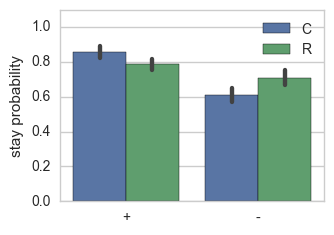

In [16]:
seaborn.set_style("whitegrid")
pylab.figure(figsize=(3.5,2.5))
seaborn.barplot('rewarded', 'stay', hue='rare', data=df, order=['+', '-'], hue_order=['C','R'])
pylab.ylim(0,1.1)
#pylab.title(mode)
pylab.legend(title='', loc='upper right')
pylab.xlabel('')
pylab.ylabel('stay probability')
pylab.tight_layout()
pylab.savefig('dummy-%s.png' % (mode), dpi=450)
pylab.show()